In [1]:
# MA Cross Backtesting on 1H BTC with following trade costs and timeframes
# - Slippage is 0.5BPS
# - Taker fee is 0.04%
# - Initial capital is 10000.0$
# - Position size per trade is 2% of account
# - Timeframe is 1H
# 

In [2]:
import warnings
warnings.filterwarnings("ignore")
def action_with_warnings():
    warnings.warn("should not appear")
with warnings.catch_warnings(record=True):
    action_with_warnings()
import yfinance          as yf
import pandas            as pd
import numpy             as np
import quantstats        as qs
import matplotlib.pyplot as plt

In [3]:
df = yf.download('BTC-USD', interval='1h', period='23mo')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-03-06 14:00:00+00:00,38916.160156,38916.250000,38745.773438,38855.722656,38855.722656,0
2022-03-06 15:00:00+00:00,38855.722656,38880.824219,38693.734375,38869.339844,38869.339844,191778816
2022-03-06 16:00:00+00:00,38868.671875,39277.136719,38842.757812,39213.242188,39213.242188,0
2022-03-06 17:00:00+00:00,39209.074219,39215.140625,38976.480469,39011.484375,39011.484375,0
2022-03-06 18:00:00+00:00,39012.792969,39100.648438,38823.753906,38872.109375,38872.109375,95217664
...,...,...,...,...,...,...
2024-02-06 10:00:00+00:00,42958.191406,43046.582031,42685.375000,42755.527344,42755.527344,256843776
2024-02-06 11:00:00+00:00,42755.265625,42793.851562,42683.925781,42786.171875,42786.171875,256159744
2024-02-06 12:00:00+00:00,42785.914062,42849.808594,42625.898438,42721.835938,42721.835938,389154816


<Axes: xlabel='Datetime'>

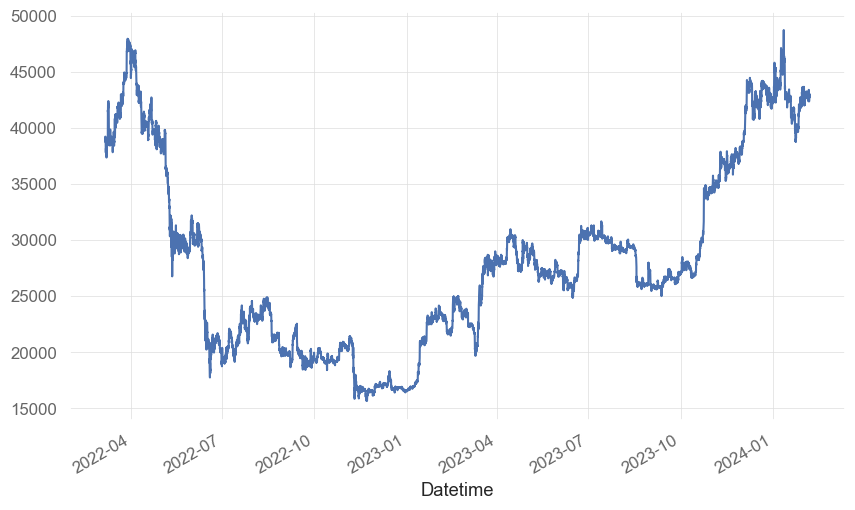

In [4]:
df['Close'].plot()

In [5]:
df['Price'] = df['Open'].shift(-1)

df

,Open,High,Low,Close,Adj Close,Volume,Price
Datetime,,,,,,,
2022-03-06 14:00:00+00:00,38916.160156,38916.250000,38745.773438,38855.722656,38855.722656,0,38855.722656
2022-03-06 15:00:00+00:00,38855.722656,38880.824219,38693.734375,38869.339844,38869.339844,191778816,38868.671875
2022-03-06 16:00:00+00:00,38868.671875,39277.136719,38842.757812,39213.242188,39213.242188,0,39209.074219
2022-03-06 17:00:00+00:00,39209.074219,39215.140625,38976.480469,39011.484375,39011.484375,0,39012.792969
2022-03-06 18:00:00+00:00,39012.792969,39100.648438,38823.753906,38872.109375,38872.109375,95217664,38877.281250
...,...,...,...,...,...,...,...
2024-02-06 10:00:00+00:00,42958.191406,43046.582031,42685.375000,42755.527344,42755.527344,256843776,42755.265625
2024-02-06 11:00:00+00:00,42755.265625,42793.851562,42683.925781,42786.171875,42786.171875,256159744,42785.914062
2024-02-06 12:00:00+00:00,42785.914062,42849.808594,42625.898438,42721.835938,42721.835938,389154816,42739.191406


In [6]:
# Signal extraction

df['MA50' ] = df['Close'].rolling(window=20).mean()
df['MA200'] = df['Close'].rolling(window=50).mean()

df['Signal'] = 0
df.loc[((df['MA50'] > df['MA200']) & (df['MA50'].shift(1) <= df['MA200'].shift(1))), 'Signal'] =  1
df.loc[((df['MA50'] < df['MA200']) & (df['MA50'].shift(1) >= df['MA200'].shift(1))), 'Signal'] = -1

In [7]:
df['Signal'].value_counts()

Signal
 0    16410
-1      209
 1      208
Name: count, dtype: int64

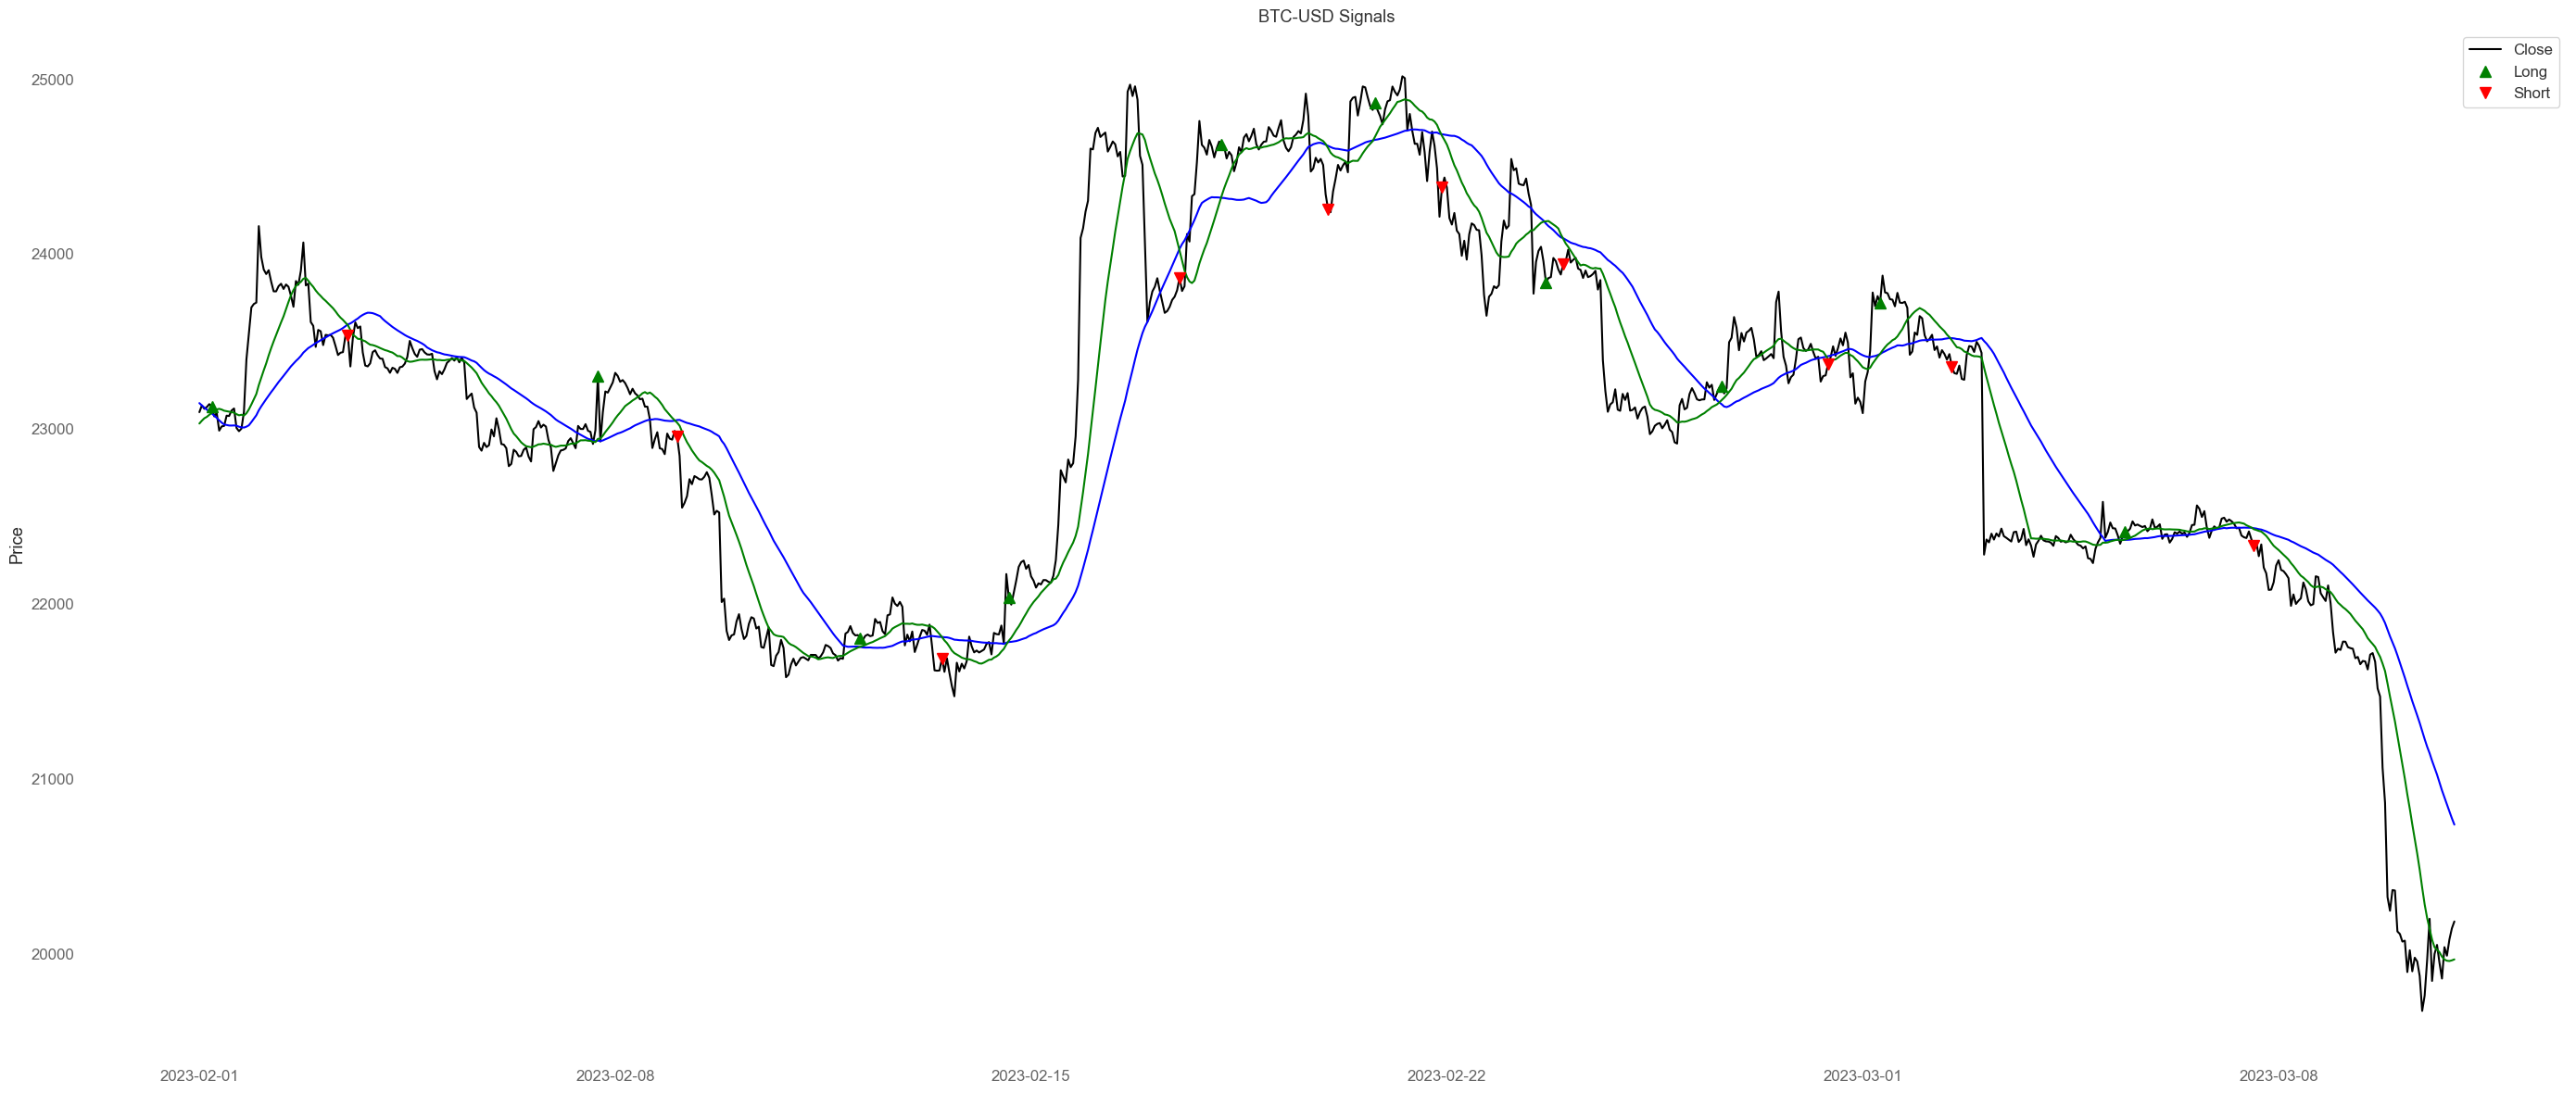

In [12]:
plot_df = df["2023-02-01":"2023-03-10"]

fig, ax1 = plt.subplots(1, figsize=(28, 12), sharex=True)

ax1.plot(plot_df.index, plot_df['Close'], label='Close', color='black')
ax1.plot(plot_df['MA200'], color='blue' )
ax1.plot(plot_df['MA50' ], color='green')
ax1.plot(plot_df[plot_df['Signal'] ==  1].index, plot_df[plot_df['Signal'] ==  1]['Close'], '^', markersize=8, color='green', label='Long' )
ax1.plot(plot_df[plot_df['Signal'] == -1].index, plot_df[plot_df['Signal'] == -1]['Close'], 'v', markersize=8, color='red'  , label='Short')
ax1.set_ylabel('Price')
ax1.set_title('BTC-USD Signals')
ax1.legend()
ax1.grid()

plt.tight_layout()
plt.show()

In [13]:
# Position tracking with slippage

slippage_bps     = 0.5 / 10000 # 0.5BPS
position         = 0
entry_timestamp  = None
entry_price      = 0
exit_timestamp   = None
exit_price       = 0
position_history = []

for index, row in df.iterrows():
    if row['Signal'] != position:
        # Exit position
        if position != 0:
            exit_timestamp = index
            exit_price     = row['Price'] * (1 - slippage_bps) if position == 1 else row['Price'] * (1 + slippage_bps)
            pct_change     = (exit_price - entry_price) / entry_price * 100
            position_history.append((entry_timestamp, exit_timestamp, entry_price, exit_price, pct_change))
        # Enter new position
        if row['Signal'] == 1:
            entry_timestamp = index
            entry_price     = row['Price'] * (1 + slippage_bps)
        elif row['Signal'] == -1:
            entry_timestamp = index
            entry_price     = row['Price'] * (1 - slippage_bps)
        position = row['Signal']

position_df = pd.DataFrame(position_history, columns=['Entry Time', 'Exit Time', 'Entry Price', 'Exit Price', 'Pct Change'])
position_df['cumret'] = position_df['Pct Change'].cumsum()

In [14]:
initial_capital    = 10000.0 # Initial capital in dollars
commission_fee     = 0.05    # 0.05% commission fee per trade
position_per_trade = 0.02    # 2% of position size per trade

account_balance = initial_capital
balance_changes = []

# Iterate through each trade in the position history
for index, trade in position_df.iterrows():
    pct_change       = trade['Pct Change']
    position_size    = account_balance * position_per_trade
    dollar_change    = position_size * pct_change
    commission       = position_size * (commission_fee/100.0)
    balance_change   = dollar_change - commission
    account_balance += balance_change
    balance_changes.append(balance_change)

position_df['Balance Change'] = balance_changes
position_df['Account History'] = initial_capital + position_df['Balance Change'].cumsum()

position_df['Entry Time'] = pd.to_datetime(position_df['Entry Time'])
position_df = position_df.set_index('Entry Time')

position_df['Account Change'] = position_df['Account History'].pct_change()

In [15]:
position_df

,Exit Time,Entry Price,Exit Price,Pct Change,cumret,Balance Change,Account History,Account Change
Entry Time,,,,,,,,
2022-03-10 14:00:00+00:00,2022-03-10 15:00:00+00:00,39259.829879,39205.276572,-0.138955,-0.138955,-27.890903,9972.109097,NaN
2022-03-12 17:00:00+00:00,2022-03-12 18:00:00+00:00,39112.986802,39095.166238,-0.045562,-0.184516,-9.186657,9962.922439,-0.000921
2022-03-13 08:00:00+00:00,2022-03-13 09:00:00+00:00,39072.015052,39000.590557,-0.182802,-0.367318,-36.524508,9926.397932,-0.003666
2022-03-14 22:00:00+00:00,2022-03-14 23:00:00+00:00,39383.312817,39662.266787,0.708305,0.340987,140.519080,10066.917012,0.014156
2022-03-18 09:00:00+00:00,2022-03-18 10:00:00+00:00,40546.496011,40457.897794,-0.218510,0.122476,-44.095144,10022.821867,-0.004380
...,...,...,...,...,...,...,...,...
2024-01-31 11:00:00+00:00,2024-01-31 12:00:00+00:00,42622.130506,42600.668989,-0.050353,-18.039910,-6.931679,6808.478465,-0.001017
2024-02-02 04:00:00+00:00,2024-02-02 05:00:00+00:00,42953.690546,43088.247824,0.313261,-17.726649,42.588568,6851.067032,0.006255
2024-02-04 00:00:00+00:00,2024-02-04 01:00:00+00:00,42998.869480,43030.975660,0.074667,-17.651981,10.162530,6861.229562,0.001483


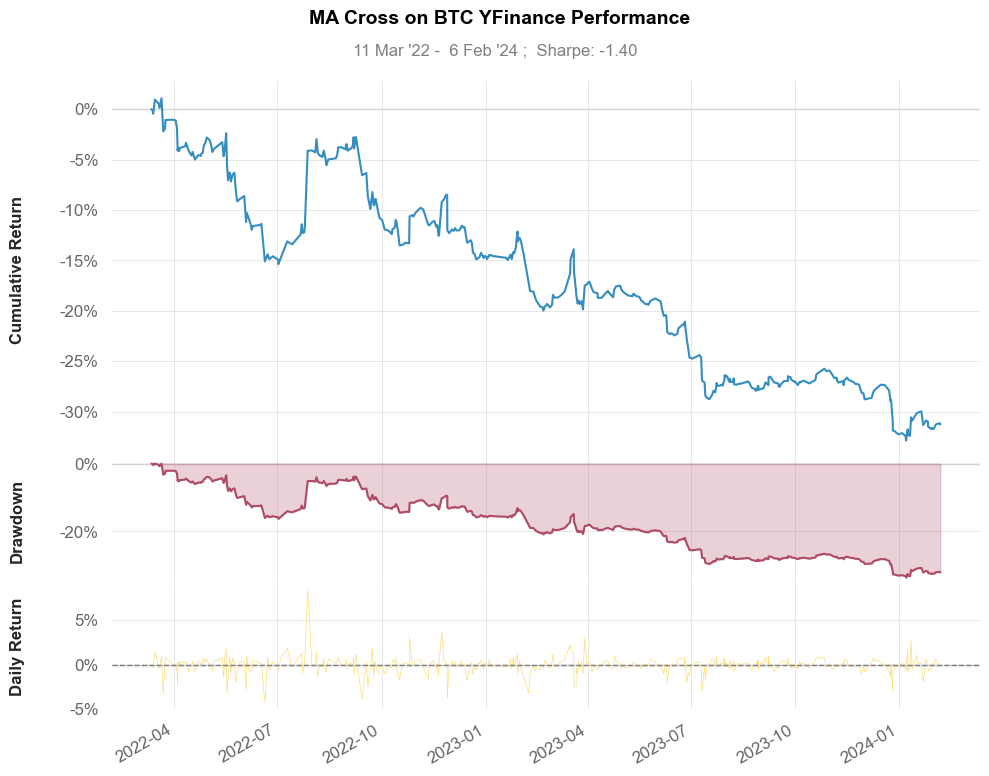

In [16]:
qs.plots.snapshot(position_df['Account Change'], title='MA Cross on BTC YFinance Performance', show=True);

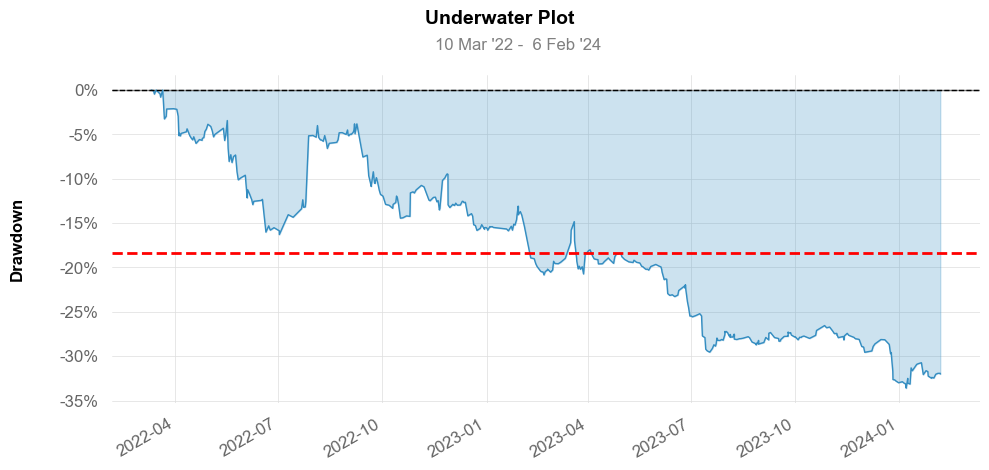

In [17]:
qs.plots.drawdown(position_df['Account Change'])

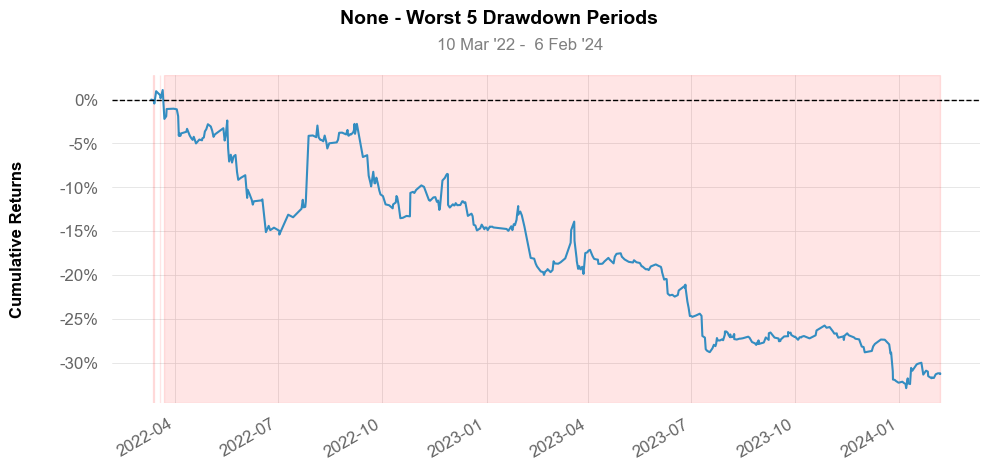

In [18]:
qs.plots.drawdowns_periods(position_df['Account Change'])

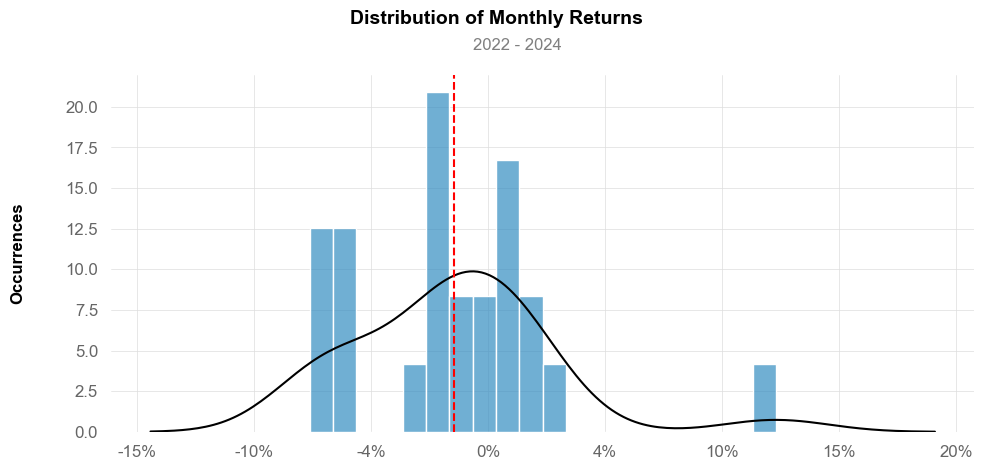

In [19]:
qs.plots.histogram(position_df['Account Change'])

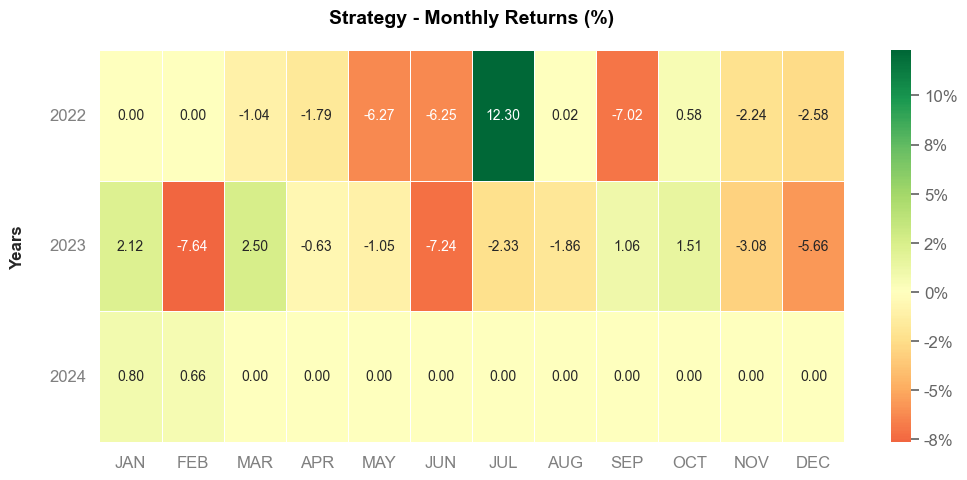

In [20]:
qs.plots.monthly_heatmap(position_df['Account Change'])

In [21]:
qs.stats.sharpe(position_df['Account Change'])

-1.4006525063150506

<Axes: xlabel='Entry Time'>

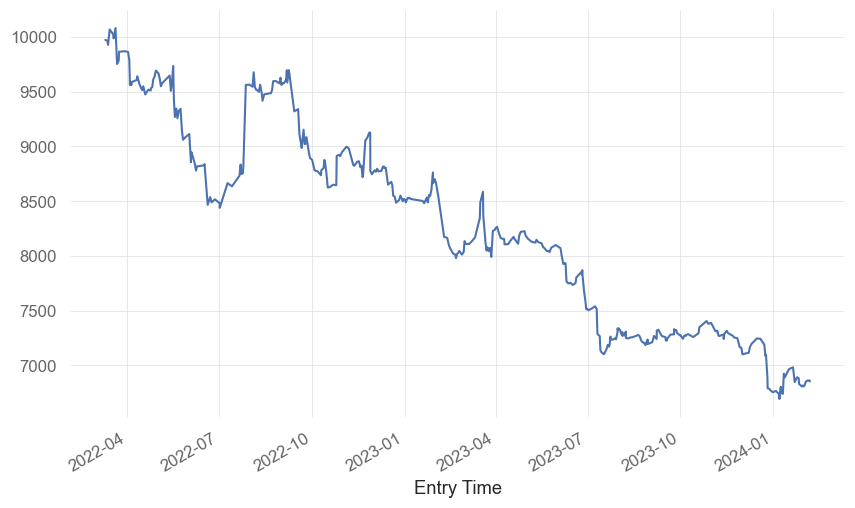

In [22]:
position_df["Account History"].plot()